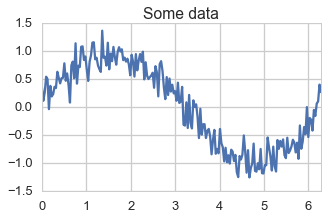

In [1]:
# <!-- collapse=True -->
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.set_style('whitegrid')
sns.set_context('talk')

np.random.seed(0)
x = np.linspace(0, 2 * math.pi, 200)
sine = np.sin(x)
err = np.random.normal(0, 0.2, len(sine))
y = sine + err
plt.figure(figsize=(5, 3))
plt.plot(x, y)
plt.xlim([0, 2 * math.pi])
plt.title('Some data')
plt.show()

In [3]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

n_conn = 60
model = Sequential()
model.add(Dense(output_dim=n_conn, input_dim=1))
model.add(Activation("relu"))
model.add(Dense(output_dim=1))
model.compile(loss='mean_squared_error', optimizer='sgd')

In [4]:
# <!-- collapse=True -->
from keras.callbacks import Callback

class TrainingHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.predictions = []
        self.i = 0
        self.save_every = 50

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.i += 1        
        if self.i % self.save_every == 0:        
            pred = model.predict(X_train)
            self.predictions.append(pred)
            
X_train = np.array(x, ndmin=2).T
Y_train = np.array(y, ndmin=2).T

In [5]:
history = TrainingHistory()
res = model.fit(X_train,
          Y_train,
          nb_epoch=5000,
          verbose=0,
          callbacks=[history])

In [6]:
# <!-- collapse=True -->
# save the animation
import matplotlib.animation as animation

def visualize_training(history, name):
    fig = plt.figure(figsize=(5, 2.5))
    plt.plot(x, y, label='data')
    line, = plt.plot(x, history.predictions[0],  label='prediction')
    plt.legend()

    def update_line(num):
        plt.title('iteration: {0}'.format((history.save_every * (num + 1))))
        line.set_xdata(x)
        line.set_ydata(history.predictions[num])
        return []

    ani = animation.FuncAnimation(fig, update_line, len(history.predictions),
                                       interval=50, blit=True)
    ani.save('../videos/{0}.mp4'.format(name), dpi=100, extra_args=['-vcodec', 'libx264'])
    plt.close()

    plt.figure(figsize=(5, 2.5))
    plt.plot(x, y, label='data')
    plt.plot(x, history.predictions[0], label='prediction')
    plt.legend()
    plt.title('iteration: 0')
    plt.savefig('../images/{0}.png'.format(name))
    plt.close()

    plt.figure(figsize=(6, 3))
    plt.plot(history.losses)
    plt.ylabel('error')
    plt.xlabel('iteration')
    plt.ylim([0, 0.5])
    plt.title('training error')
    plt.show()

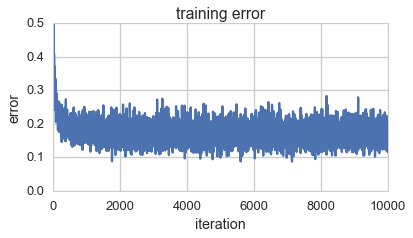

In [7]:
visualize_training(history, 'tiny-sine-one-layer')  

In [8]:
def video(fname, mimetype='mp4'):
    """Load the video in the file `fname`, with given mimetype, and display as HTML5 video.
    """
    from IPython.display import HTML
    from base64 import b64encode
    
    with open(fname, "rb") as f: 
        video_encoded = b64encode(f.read()).decode("utf-8")

    video_tag= """
<center><video controls style='max-width:100%'>
<source src='data:{mimetype};base64,{b64}' type='video/{mimetype}' loop=1 autoplay=1>
Your browser does not support the video tag.
</video><center/>""".format(mimetype=mimetype, b64=video_encoded)
    return HTML(data=video_tag)

video('../videos/tiny-sine-one-layer.mp4')

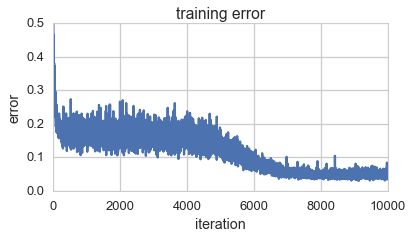

In [9]:
n_conn = 10
model = Sequential()
model.add(Dense(output_dim=n_conn, input_dim=1))
model.add(Activation("relu"))
model.add(Dense(output_dim=n_conn))
model.add(Activation("relu"))
model.add(Dense(output_dim=1))
model.compile(loss='mean_squared_error', optimizer='sgd')

X_train = np.array(x, ndmin=2).T
Y_train = np.array(y, ndmin=2).T
history = TrainingHistory()
model.fit(X_train,
          Y_train,
          nb_epoch=5000,
          verbose=0,
          callbacks=[history])

visualize_training(history, 'tiny-sine-two-layer')

In [10]:
video('../videos/tiny-sine-two-layer.mp4')

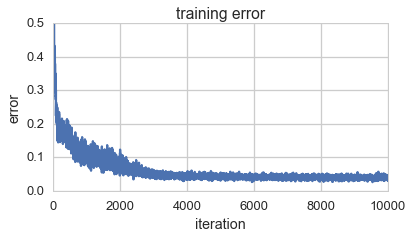

In [11]:
from keras.optimizers import Adam

n_conn = 60
model = Sequential()
model.add(Dense(output_dim=n_conn, input_dim=1))
model.add(Activation("relu"))
model.add(Dense(output_dim=1))
adam = Adam()
model.compile(loss='mean_squared_error', optimizer=adam)

X_train = np.array(x, ndmin=2).T
Y_train = np.array(y, ndmin=2).T
history = TrainingHistory()
model.fit(X_train,
          Y_train,
          nb_epoch=5000,
          verbose=0,
          callbacks=[history])

visualize_training(history, 'tiny-sine-one-layer-adam')

In [12]:
video('../videos/tiny-sine-one-layer-adam.mp4')

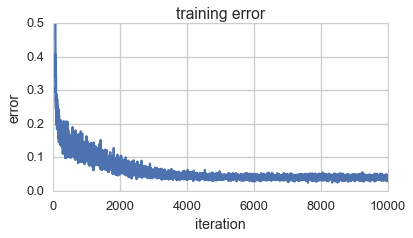

In [13]:
n_conn = 10
model = Sequential()
model.add(Dense(output_dim=n_conn, input_dim=1))
model.add(Activation("relu"))
model.add(Dense(output_dim=n_conn))
model.add(Activation("relu"))
model.add(Dense(output_dim=1))
adam = Adam()
model.compile(loss='mean_squared_error', optimizer=adam)

X_train = np.array(x, ndmin=2).T
Y_train = np.array(y, ndmin=2).T
history = TrainingHistory()
model.fit(X_train,
          Y_train,
          nb_epoch=5000,
          verbose=0,
          callbacks=[history])

visualize_training(history, 'tiny-sine-two-layer-adam')

In [14]:
video('../videos/tiny-sine-two-layer-adam.mp4')